# COVID-19 Infection Report

A report I made to toy around with data from places I care about (Portugal, Spain/Castilla-La Mancha and Florida).

<a href="https://colab.research.google.com/github/gincos/data-science-portfolio/blob/master/fun/covid_19_infection_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Extract the data from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [3]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

  0% 0.00/2.03M [00:00<?, ?B/s]
100% 2.03M/2.03M [00:00<00:00, 66.4MB/s]


In [4]:
#unzipping the zip files and deleting the zip files
!unzip -o \*.zip  && rm *.zip

Archive:  novel-corona-virus-2019-dataset.zip
  inflating: COVID19_line_list_data.csv  
  inflating: COVID19_open_line_list.csv  
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_confirmed_US.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_deaths_US.csv  
  inflating: time_series_covid_19_recovered.csv  


### Get the insights for Portugal, Florida and Spain

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("covid_19_data.csv")

In [7]:
#df = df.drop(["Province/State"], axis=1)
df = df.sort_values(by=["Country/Region", "ObservationDate"])

In [8]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2663,2664,02/28/2020,NaN,Azerbaijan,2020-02-28T15:03:26,1.0,0.0,0.0
4674,4675,03/10/2020,NaN,"('St. Martin',)",2020-03-10T05:33:02,2.0,0.0,0.0
2258,2259,02/24/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2351,2352,02/25/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0
2452,2453,02/26/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0


In [9]:
df["Active Cases"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]

In [10]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active Cases
2663,2664,02/28/2020,NaN,Azerbaijan,2020-02-28T15:03:26,1.0,0.0,0.0,1.0
4674,4675,03/10/2020,NaN,"('St. Martin',)",2020-03-10T05:33:02,2.0,0.0,0.0,2.0
2258,2259,02/24/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0,1.0
2351,2352,02/25/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0,1.0
2452,2453,02/26/2020,NaN,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0,1.0


In [11]:
df_pt = df[df["Country/Region"] == "Portugal"]
df_us = df[(df["Country/Region"] == "US") & (df["Province/State"] == "Florida")]
df_es = df[(df["Country/Region"] == "Spain") & (df["Province/State"] == "Castilla - La Mancha")]

all_dfs = [df_pt, df_us, df_es]

In [ ]:
for current_df in all_dfs:
  current_df["Previous Active Cases"] = current_df["Active Cases"].shift(1)
  current_df["Previous Active Cases"] = current_df["Previous Active Cases"].fillna(0.0)
  current_df["Previous Deaths"] = current_df["Deaths"].shift(1)
  current_df["Previous Deaths"] = current_df["Previous Deaths"].fillna(0.0)
  current_df["% of Increment of Active Cases"] = ((current_df["Active Cases"] - current_df["Previous Active Cases"]) / current_df["Previous Active Cases"]) * 100
  current_df["% of Increment of Active Cases"] = current_df["% of Increment of Active Cases"].replace([np.inf, -np.inf], 0.0)
  current_df["% of Increment of Deaths"] = ((current_df["Deaths"] - current_df["Previous Deaths"]) / current_df["Previous Deaths"]) * 100
  current_df["% of Increment of Deaths"] = current_df["% of Increment of Deaths"].replace([np.inf, -np.inf], 0.0)
  current_df["Mortality"] = ((current_df["Deaths"] / current_df["Confirmed"]) * 100)
  current_df["Averaged % of Increment of Active Cases"] = current_df["% of Increment of Active Cases"].rolling(min_periods=1, window=5, center=True).mean()
  current_df["Averaged % of Increment of Deaths"] = current_df["% of Increment of Deaths"].rolling(min_periods=1, window=5, center=True).mean()

  current_df = current_df.groupby("ObservationDate")

In [13]:
df_pt.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active Cases,Previous Active Cases,Previous Deaths,% of Increment of Active Cases,% of Increment of Deaths,Mortality,Averaged % of Increment of Active Cases,Averaged % of Increment of Deaths
64985,64986,07/16/2020,NaN,Portugal,2020-07-17 04:34:50,47765.0,1679.0,32476.0,13610.0,13640.0,1676.0,-0.219941,0.178998,3.515126,-0.773012,0.263442
65713,65714,07/17/2020,NaN,Portugal,2020-07-18 04:34:45,48077.0,1682.0,32790.0,13605.0,13610.0,1679.0,-0.036738,0.178678,3.498554,-0.369929,0.250622
66454,66455,07/18/2020,NaN,Portugal,2020-07-19 04:34:58,48390.0,1684.0,33153.0,13553.0,13605.0,1682.0,-0.382212,0.118906,3.480058,-0.157170,0.178381
67196,67197,07/19/2020,NaN,Portugal,2020-07-20 05:34:40,48636.0,1689.0,33369.0,13578.0,13553.0,1684.0,0.184461,0.296912,3.472736,-0.141477,0.178227
67938,67939,07/20/2020,NaN,Portugal,2020-07-21 04:38:46,48771.0,1691.0,33547.0,13533.0,13578.0,1689.0,-0.331418,0.118413,3.467224,-0.176390,0.178077


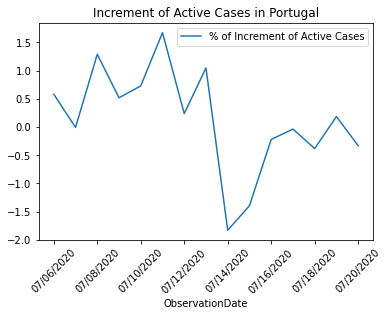

In [14]:
df_pt.tail(15).plot(x="ObservationDate", y="% of Increment of Active Cases", rot=45, title="Increment of Active Cases in Portugal")

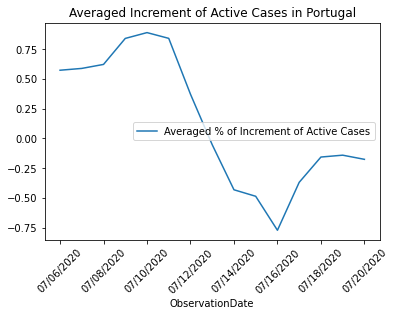

In [15]:
df_pt.tail(15).plot(x="ObservationDate", y="Averaged % of Increment of Active Cases", rot=45, title="Averaged Increment of Active Cases in Portugal")

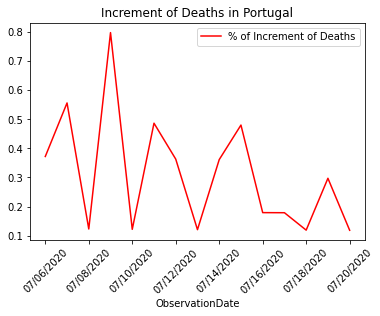

In [16]:
df_pt.tail(15).plot(x="ObservationDate", y="% of Increment of Deaths", rot=45, title="Increment of Deaths in Portugal", color="r")

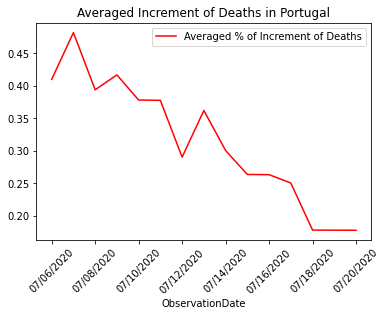

In [17]:
df_pt.tail(15).plot(x="ObservationDate", y="Averaged % of Increment of Deaths", rot=45, title="Averaged Increment of Deaths in Portugal", color="r")

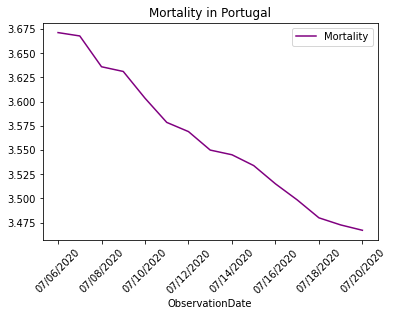

In [18]:
df_pt.tail(15).plot(x="ObservationDate", y="Mortality", rot=45, title="Mortality in Portugal", color="#800080")

In [19]:
df_us.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active Cases,Previous Active Cases,Previous Deaths,% of Increment of Active Cases,% of Increment of Deaths,Mortality,Averaged % of Increment of Active Cases,Averaged % of Increment of Deaths
65168,65169,07/16/2020,Florida,US,2020-07-17 04:34:50,315775.0,4677.0,0.0,311098.0,297289.0,4521.0,4.644975,3.450564,1.481118,3.645645,2.737389
65898,65899,07/17/2020,Florida,US,2020-07-18 04:34:45,327241.0,4805.0,0.0,322436.0,311098.0,4677.0,3.644511,2.736797,1.468337,3.739006,2.475598
66639,66640,07/18/2020,Florida,US,2020-07-19 04:34:58,337569.0,4895.0,0.0,332674.0,322436.0,4805.0,3.175204,1.873049,1.450074,3.632368,2.328847
67381,67382,07/19/2020,Florida,US,2020-07-20 05:34:40,350047.0,4982.0,0.0,345065.0,332674.0,4895.0,3.724667,1.777324,1.423237,3.379216,2.048418
68123,68124,07/20/2020,Florida,US,2020-07-21 04:38:46,360394.0,5072.0,0.0,355322.0,345065.0,4982.0,2.972483,1.806503,1.407349,3.290785,1.818959


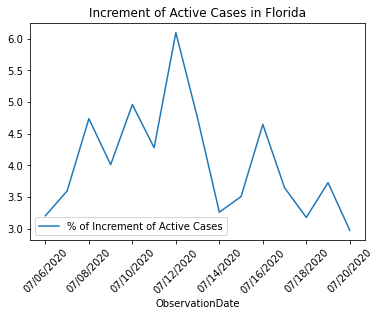

In [20]:
df_us.tail(15).plot(x="ObservationDate", y="% of Increment of Active Cases", rot=45, title="Increment of Active Cases in Florida")

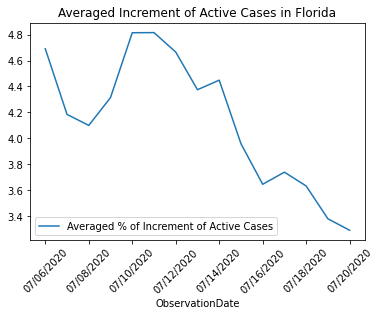

In [21]:
df_us.tail(15).plot(x="ObservationDate", y="Averaged % of Increment of Active Cases", rot=45, title="Averaged Increment of Active Cases in Florida")

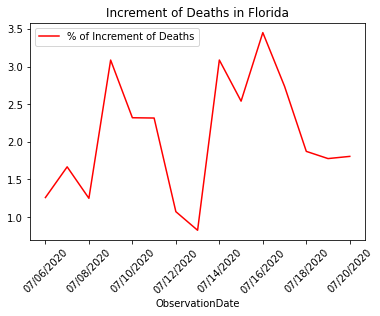

In [22]:
df_us.tail(15).plot(x="ObservationDate", y="% of Increment of Deaths", rot=45, title="Increment of Deaths in Florida", color="r")

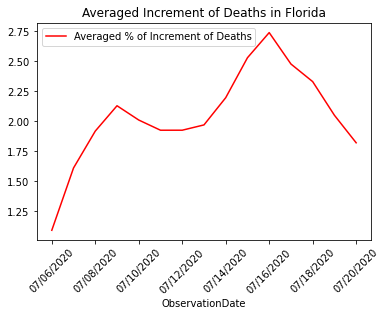

In [23]:
df_us.tail(15).plot(x="ObservationDate", y="Averaged % of Increment of Deaths", rot=45, title="Averaged Increment of Deaths in Florida", color="r")

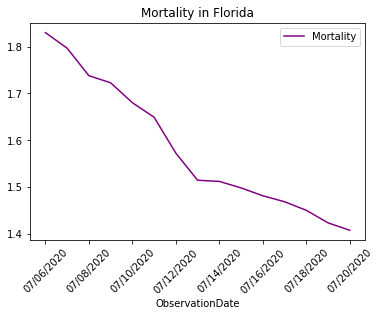

In [24]:
df_us.tail(15).plot(x="ObservationDate", y="Mortality", rot=45, title="Mortality in Florida", color="#800080")

In [25]:
df_es.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active Cases,Previous Active Cases,Previous Deaths,% of Increment of Active Cases,% of Increment of Deaths,Mortality,Averaged % of Increment of Active Cases,Averaged % of Increment of Deaths
65115,65116,07/16/2020,Castilla - La Mancha,Spain,2020-07-17 04:34:50,18413.0,3032.0,6392.0,8989.0,8976.0,3031.0,0.144831,0.032992,16.466627,0.077942,0.026392
65843,65844,07/17/2020,Castilla - La Mancha,Spain,2020-07-18 04:34:45,18431.0,3034.0,6392.0,9005.0,8989.0,3032.0,0.177995,0.065963,16.461397,0.075712,0.026392
66584,66585,07/18/2020,Castilla - La Mancha,Spain,2020-07-19 04:34:58,18431.0,3034.0,6392.0,9005.0,9005.0,3034.0,0.000000,0.000000,16.461397,0.175615,0.013199
67326,67327,07/19/2020,Castilla - La Mancha,Spain,2020-07-20 05:34:40,18431.0,3034.0,6392.0,9005.0,9005.0,3034.0,0.000000,0.000000,16.461397,0.183311,0.008251
68068,68069,07/20/2020,Castilla - La Mancha,Spain,2020-07-21 04:38:46,18480.0,3033.0,6392.0,9055.0,9005.0,3034.0,0.555247,-0.032960,16.412338,0.185082,-0.010987


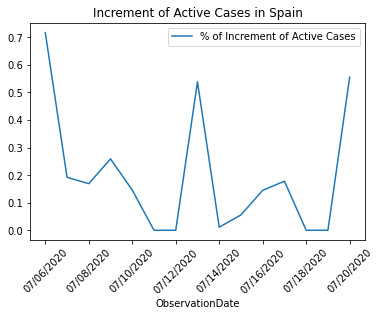

In [26]:
df_es.tail(15).plot(x="ObservationDate", y="% of Increment of Active Cases", rot=45, title="Increment of Active Cases in Spain")

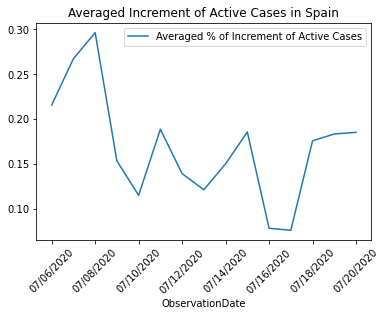

In [27]:
df_es.tail(15).plot(x="ObservationDate", y="Averaged % of Increment of Active Cases", rot=45, title="Averaged Increment of Active Cases in Spain")

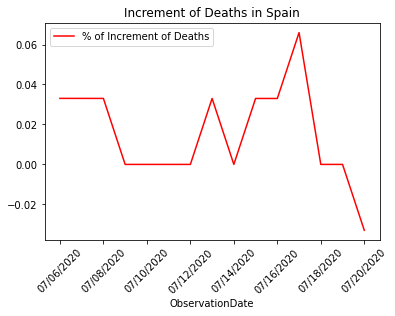

In [28]:
df_es.tail(15).plot(x="ObservationDate", y="% of Increment of Deaths", rot=45, title="Increment of Deaths in Spain", color="r")

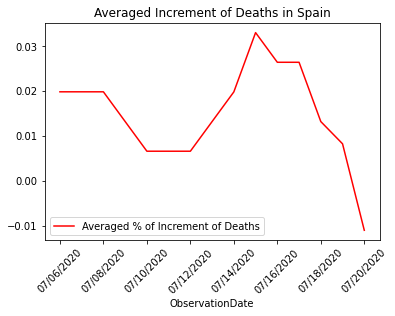

In [29]:
df_es.tail(15).plot(x="ObservationDate", y="Averaged % of Increment of Deaths", rot=45, title="Averaged Increment of Deaths in Spain", color="r")

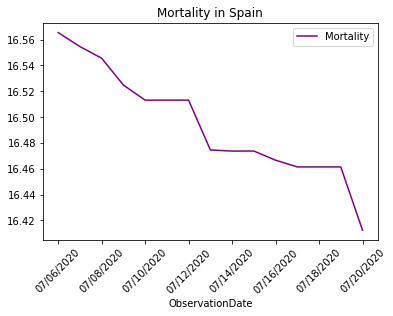

In [30]:
df_es.tail(15).plot(x="ObservationDate", y="Mortality", rot=45, title="Mortality in Spain", color="#800080")

### Generate a general report

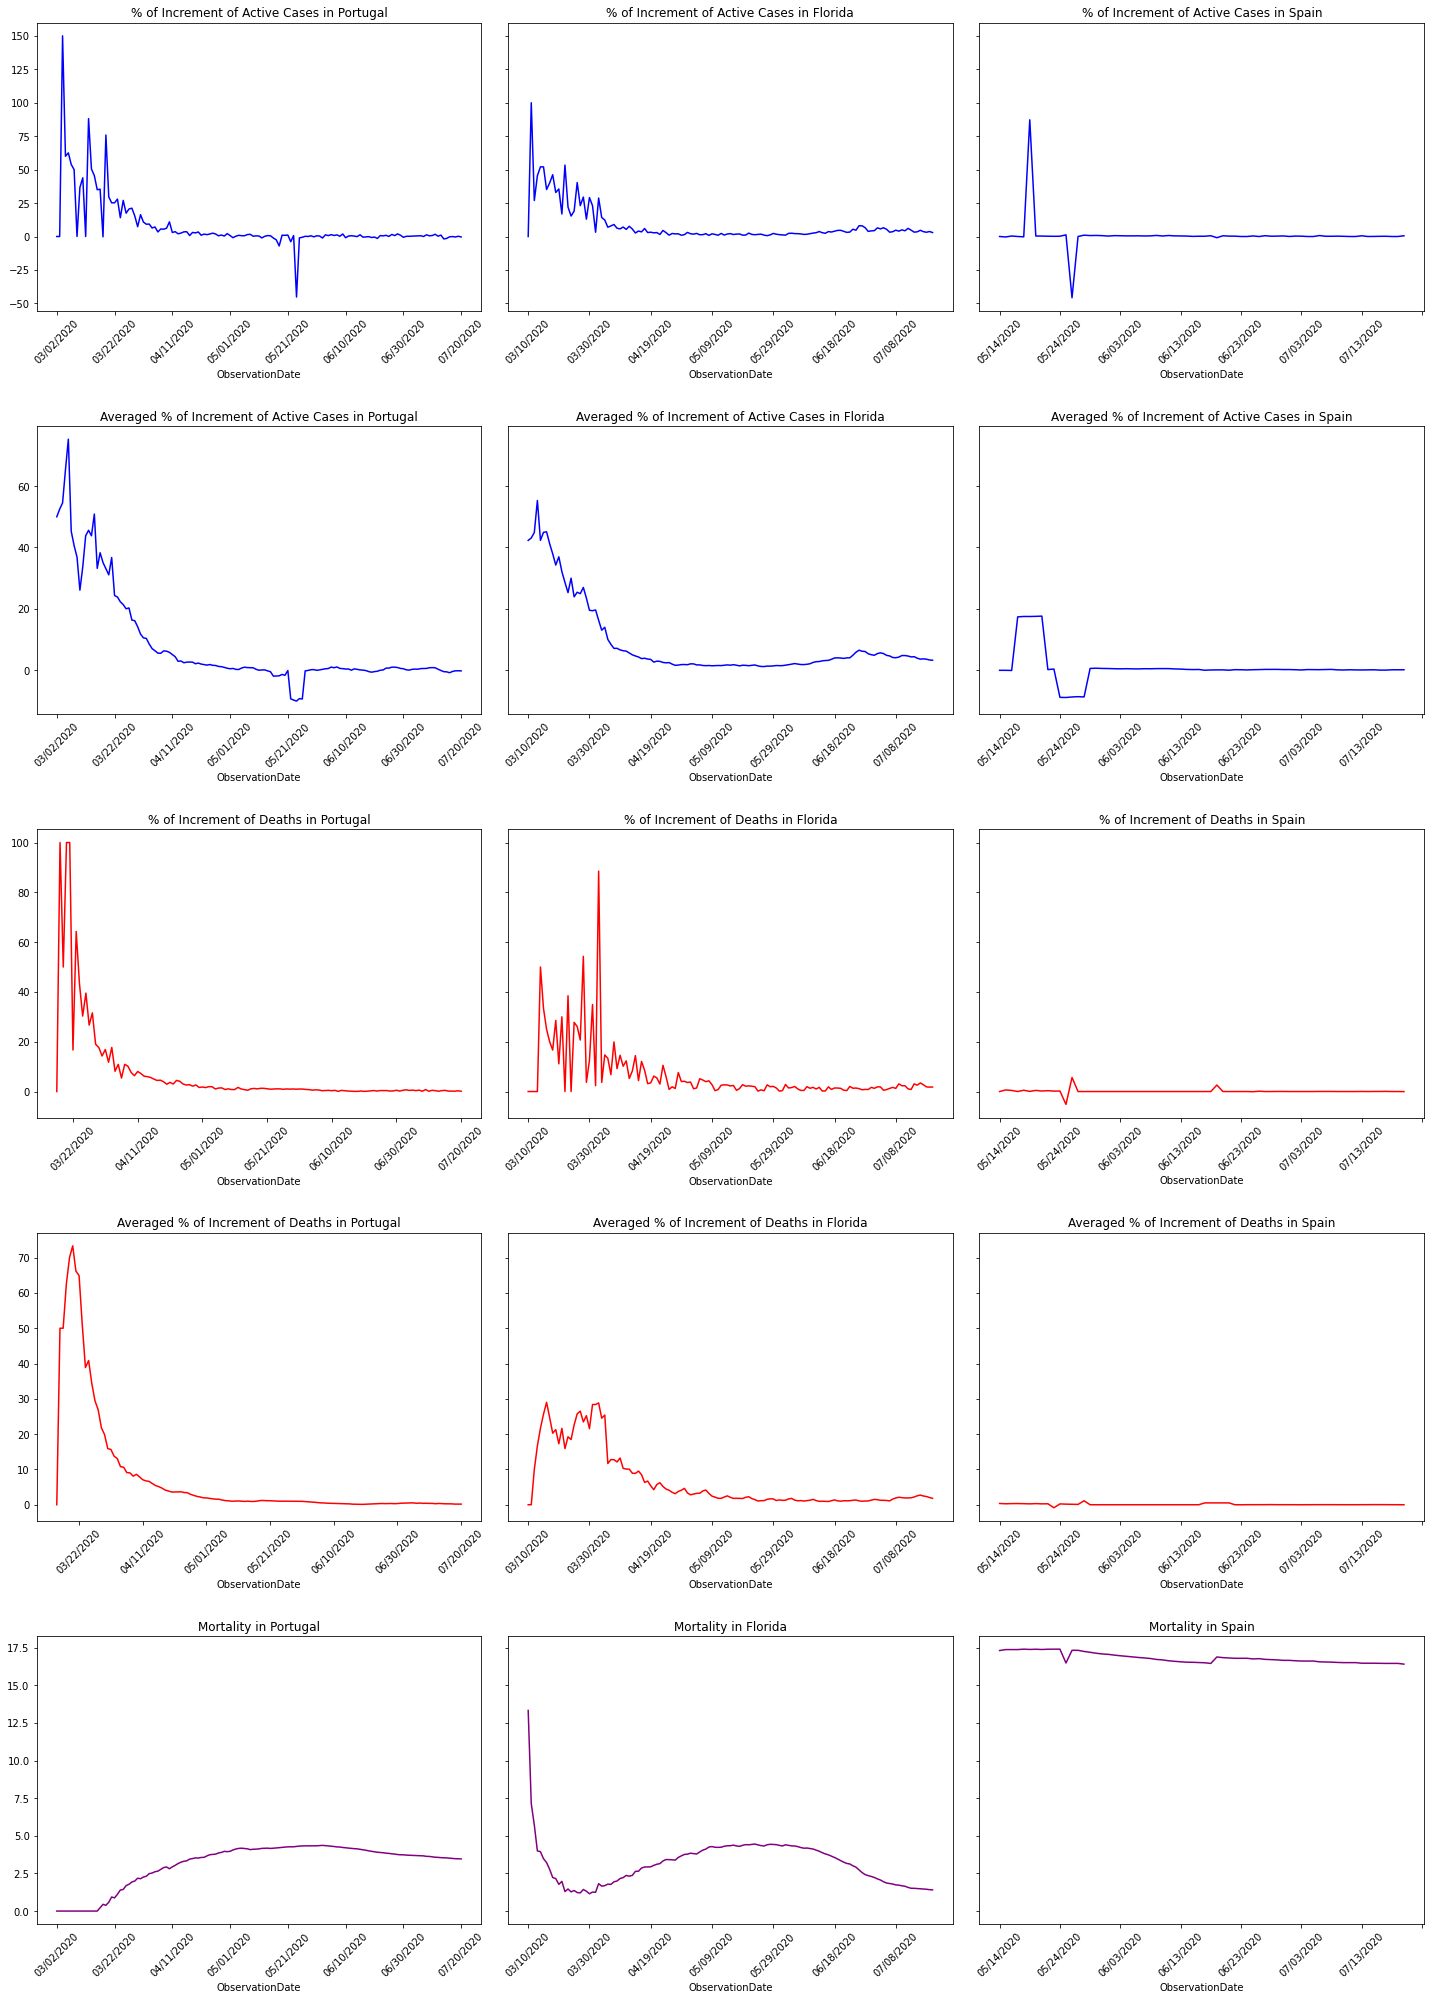

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 27), sharey='row')
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

titles_x = ["Portugal", "Florida", "Spain"]
titles_y = [
            "% of Increment of Active Cases", 
            "Averaged % of Increment of Active Cases", 
            "% of Increment of Deaths",
            "Averaged % of Increment of Deaths", 
            "Mortality"
            ]
colors_y = ["b", "b", "r", "r", "#800080"]

for i, current_df in enumerate([df_pt, df_us, df_es]):
  for j in range(5):
    current_df.plot(x="ObservationDate", 
                    y=titles_y[j], 
                    rot=45, 
                    ax=axes[j, i], 
                    color=colors_y[j], 
                    title=titles_y[j] + " in " + titles_x[i],
                    legend=False)

In [32]:
fig.savefig("general_report.png")

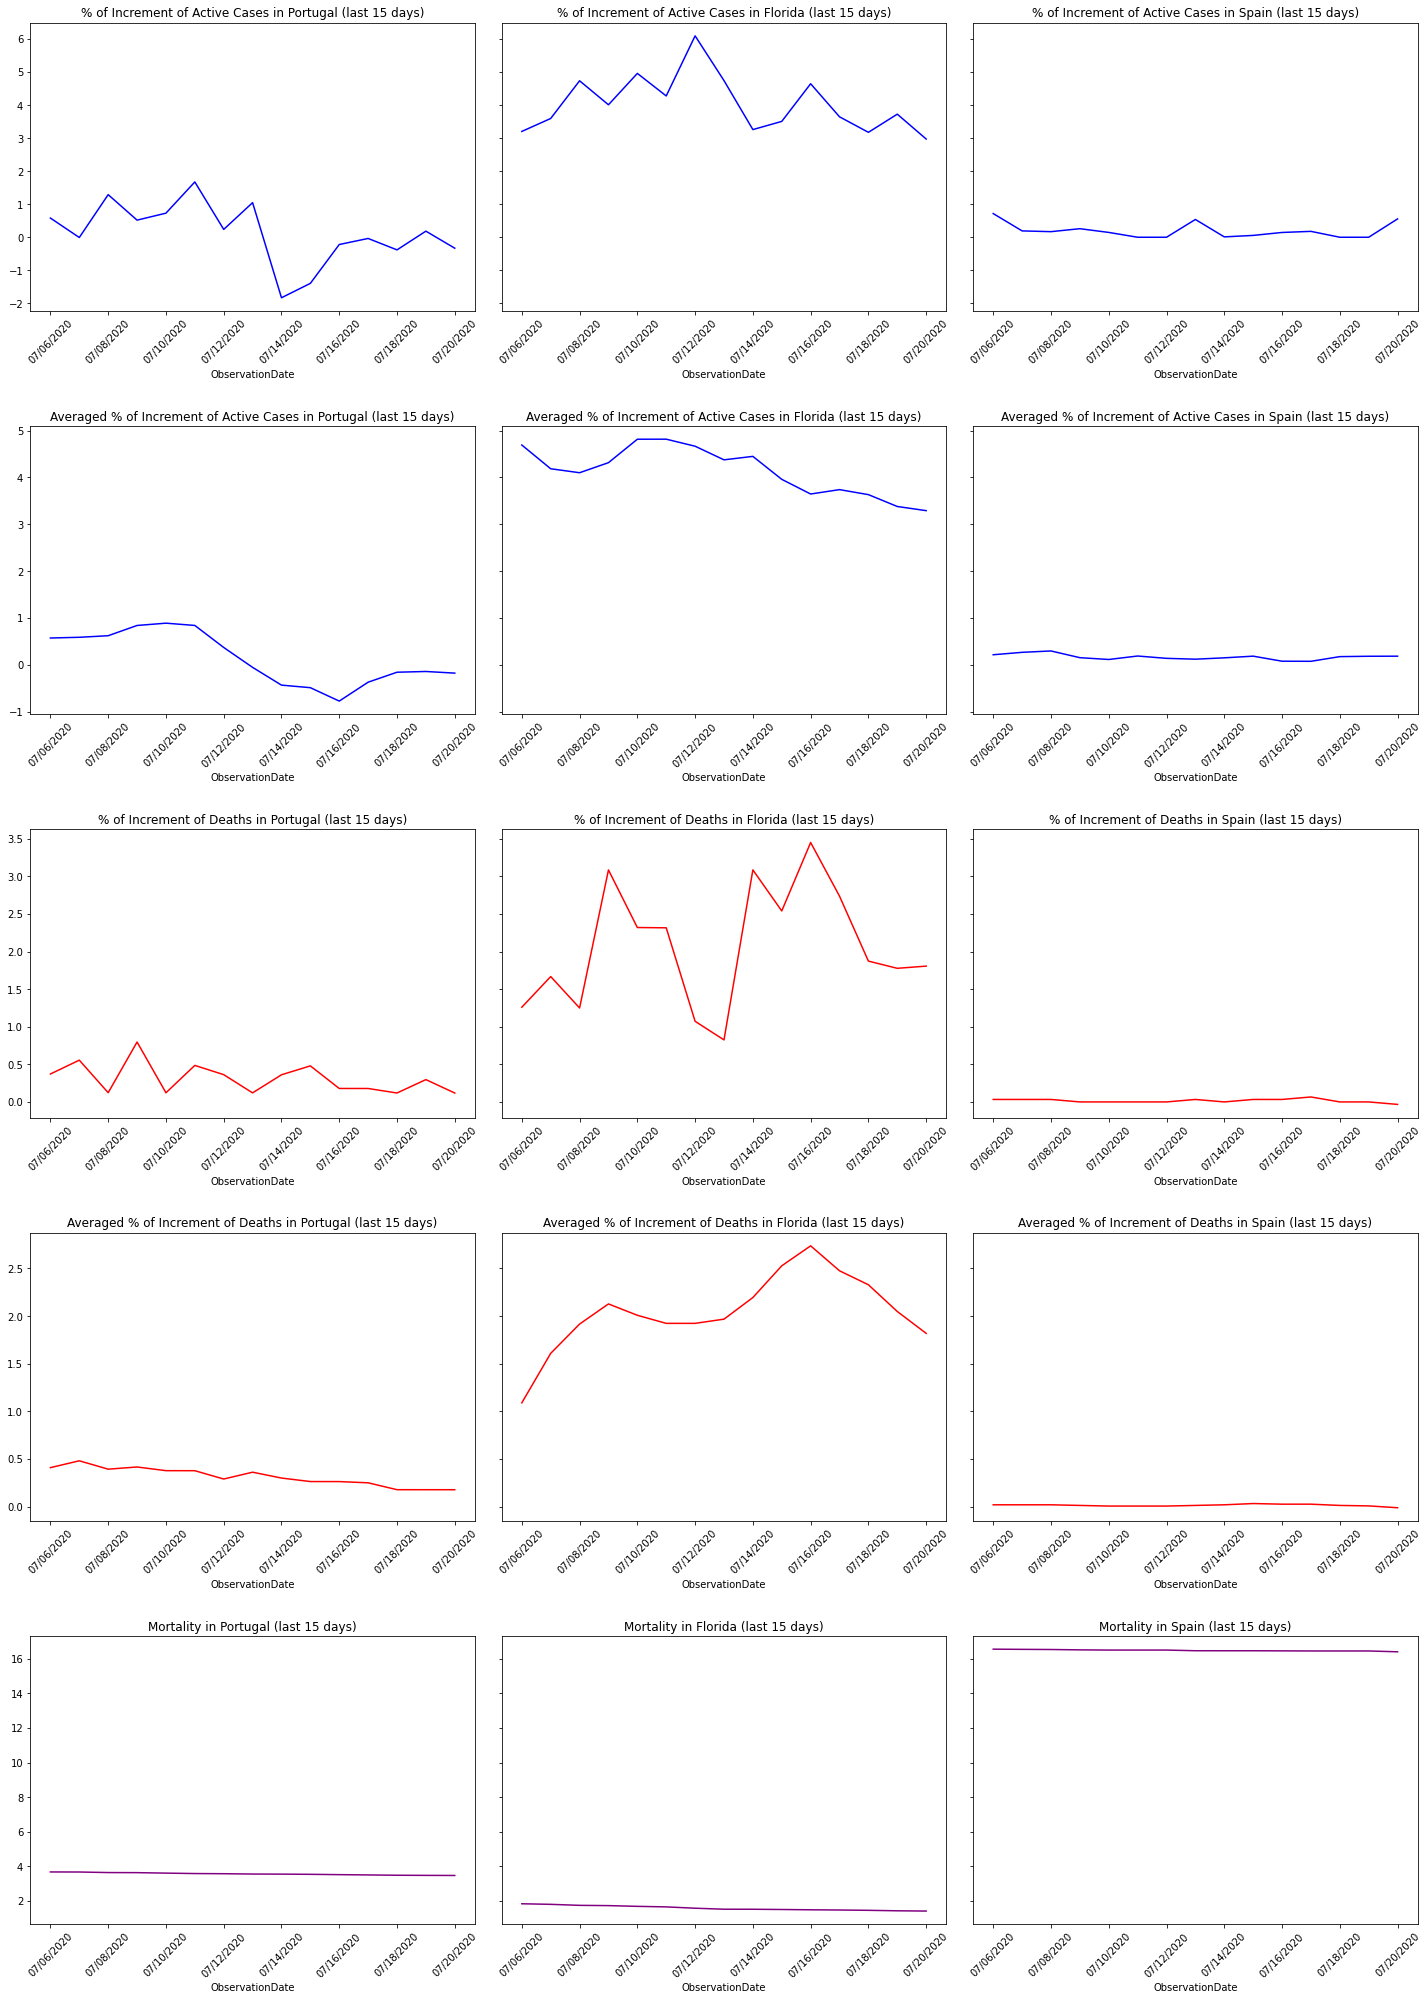

In [33]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 27), sharey='row')
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

titles_x = ["Portugal", "Florida", "Spain"]
titles_y = [
            "% of Increment of Active Cases", 
            "Averaged % of Increment of Active Cases", 
            "% of Increment of Deaths",
            "Averaged % of Increment of Deaths", 
            "Mortality"
            ]
colors_y = ["b", "b", "r", "r", "#800080"]

for i, current_df in enumerate([df_pt, df_us, df_es]):
  for j in range(5):
    current_df.tail(15).plot(x="ObservationDate", 
                    y=titles_y[j], 
                    rot=45, 
                    ax=axes[j, i], 
                    color=colors_y[j], 
                    title=titles_y[j] + " in " + titles_x[i] + " (last 15 days)",
                    legend=False)

In [34]:
fig.savefig("general_report_15_days.png")